In [106]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [107]:
df=pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [108]:
df.shape

(569, 33)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [110]:
# Drop unnecessary columns
df.drop(["Unnamed: 32","id"],axis=1,inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [111]:
# Categorical data convert to numeric data
df["diagnosis"] = [
    1 if item == "M" 
    else 0  for item in df["diagnosis"]]

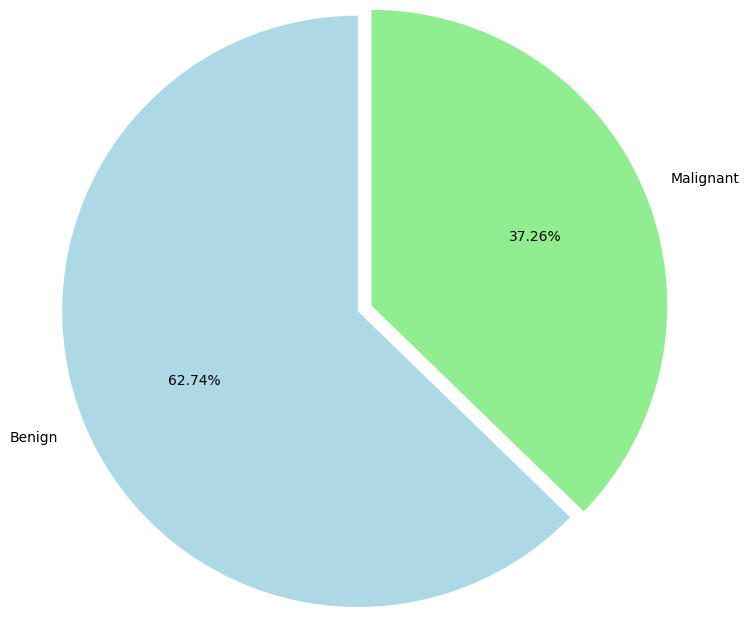

In [112]:
# Pie chart
plt.pie(df.diagnosis.value_counts(), startangle=90, explode=[0.05, 0.05], autopct='%0.2f%%',
        labels=['Benign', 'Malignant'], colors=['#add8e6', '#90ee90'], radius=2)
plt.show()


**Correlation Matrix**

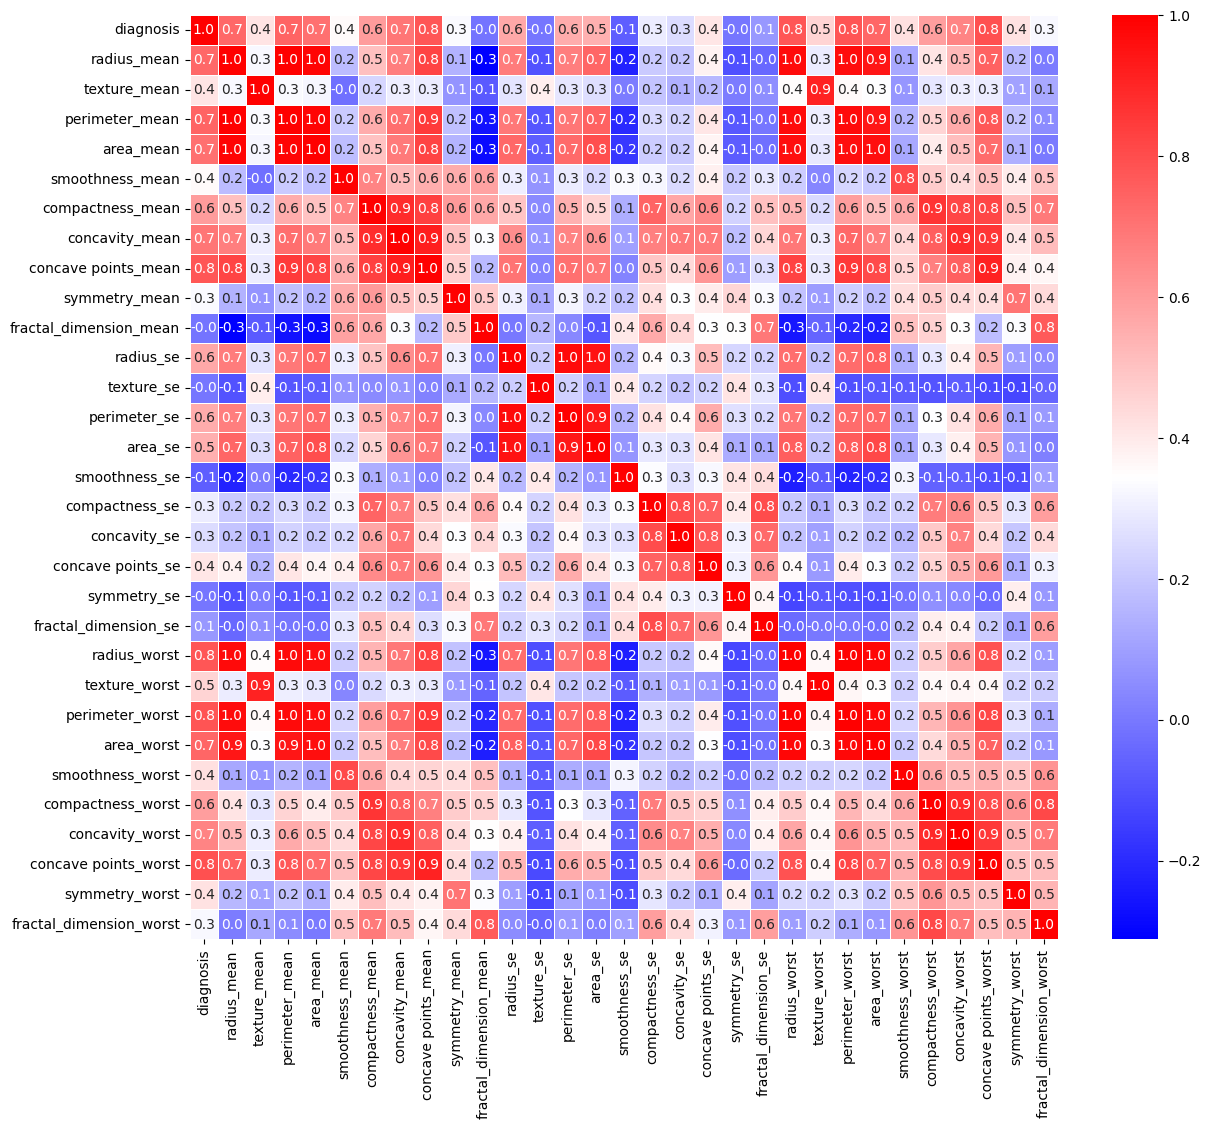

In [113]:
import seaborn as sns
f,ax = plt.subplots(figsize=(14,12))
sns.heatmap(df.corr(), cmap="bwr", annot=True, linewidths=0.5, fmt= '.1f',ax=ax)
plt.show()

**PCA (Principal Component Analysis)**

In [114]:
from sklearn.preprocessing import StandardScaler
Y = df["diagnosis"]
X = df.drop('diagnosis', axis=1)

In [115]:
sc = StandardScaler()
X = sc.fit_transform(X)
X.shape

(569, 30)

In [116]:
#PCA
from sklearn.decomposition import PCA
n_components = 3
pca = PCA(n_components=n_components)
pca.fit(X)
components = pca.transform(X)
X.shape

(569, 30)

In [117]:
components.shape

(569, 3)

In [118]:
pca.explained_variance_ratio_
np.cumsum(pca.explained_variance_ratio_)

array([0.44272026, 0.63243208, 0.72636371])

In [119]:
df_pca=pd.DataFrame({"PC":["PC1","PC2","PC3"],
                     "var": np.cumsum(pca.explained_variance_ratio_)})
                    
df_pca

,PC,var
0,PC1,0.442720
1,PC2,0.632432
2,PC3,0.726364


**PCA Visualization**

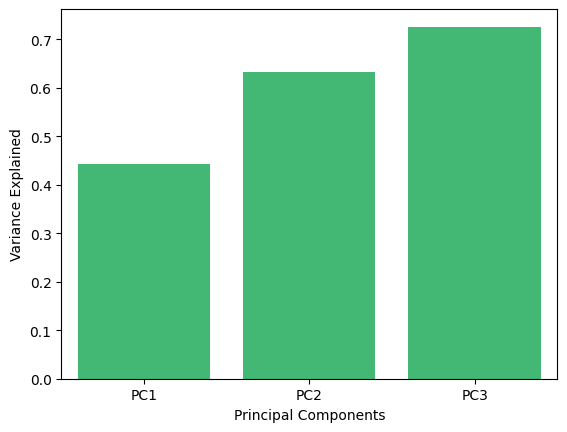

In [120]:
sns.barplot(x="PC", y="var", data=df_pca, color="#2ecc71")
plt.ylabel("Variance Explained")
plt.xlabel("Principal Components")
plt.show()

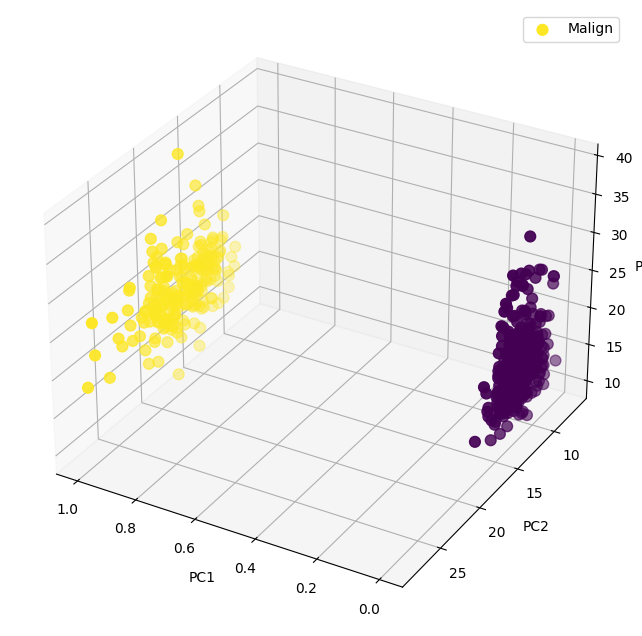

In [121]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=df['diagnosis'], s=60)
ax.legend(['Malign'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.view_init(30, 120)

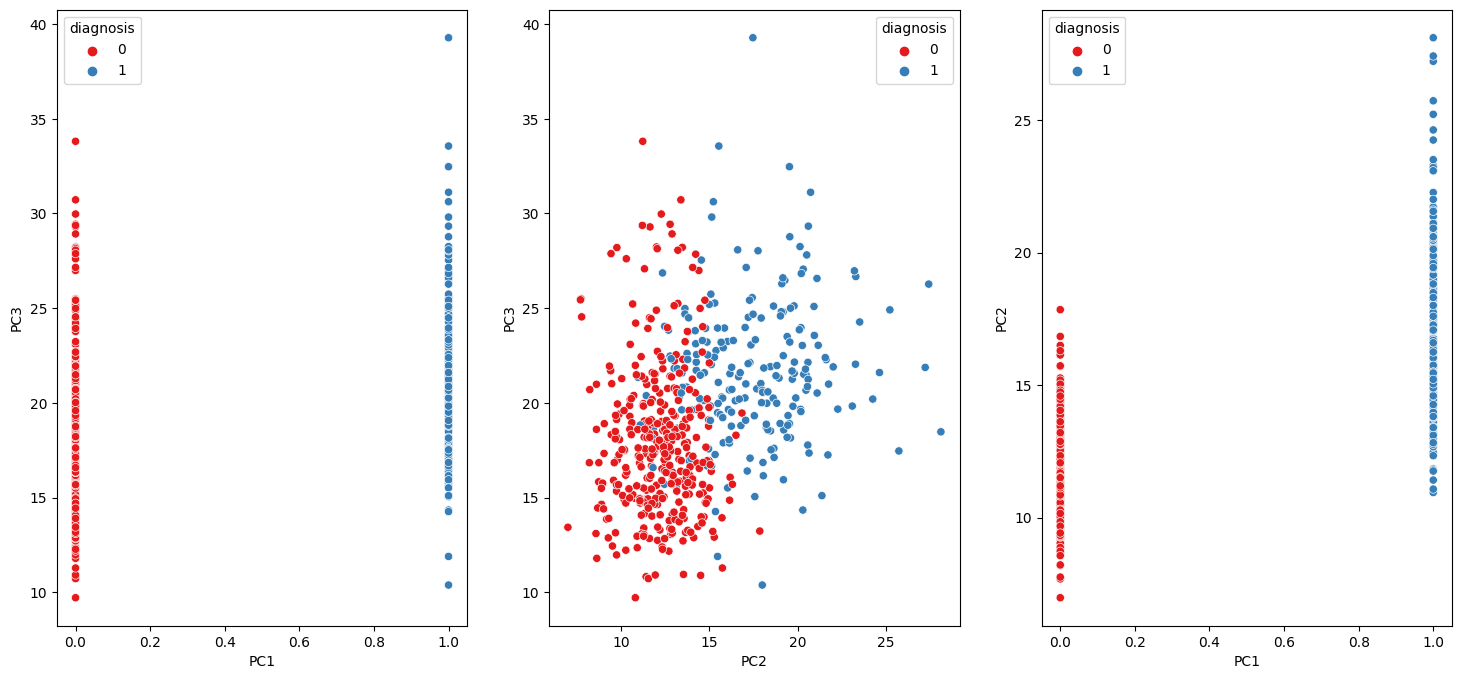

In [122]:
# First subplot
plt.figure(figsize=(18, 8))
plt.subplot(1, 3, 1)
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 2], hue=df['diagnosis'], palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC3')

# Second subplot
plt.subplot(1, 3, 2)
sns.scatterplot(x=df.iloc[:, 1], y=df.iloc[:, 2], hue=df['diagnosis'], palette='Set1')
plt.xlabel('PC2')
plt.ylabel('PC3')


# 3rd subplot
plt.subplot(1, 3, 3)
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df['diagnosis'], palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()

In [123]:
pca = PCA(n_components=3)  # Set the appropriate number of components
pca.fit(df)

# Create a DataFrame for principal components
df_pc = pd.DataFrame(pca.components_, columns=df.columns)

# Display the DataFrame
df_pc

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.000532,0.005086,0.002197,0.035076,0.516826,0.000004,0.000041,0.000082,0.000048,0.000007,...,0.007155,0.003067,0.049458,0.852063,0.000006,0.000101,0.000169,0.000074,0.000018,0.000002
1,-0.000220,0.009287,-0.002882,0.062748,0.851824,-0.000015,-0.000003,0.000075,0.000046,-0.000025,...,-0.000569,-0.013215,-0.000186,-0.519742,-0.000077,-0.000256,-0.000175,-0.000031,-0.000157,-0.000055
2,-0.001755,-0.012343,-0.006356,-0.071671,-0.027894,0.000073,0.000102,0.000266,0.000036,0.000141,...,-0.015566,-0.031546,-0.092316,-0.039317,-0.000042,-0.000765,-0.000847,-0.000334,-0.000350,-0.000041


Text(158.22222222222223, 0.5, 'Principal Components')

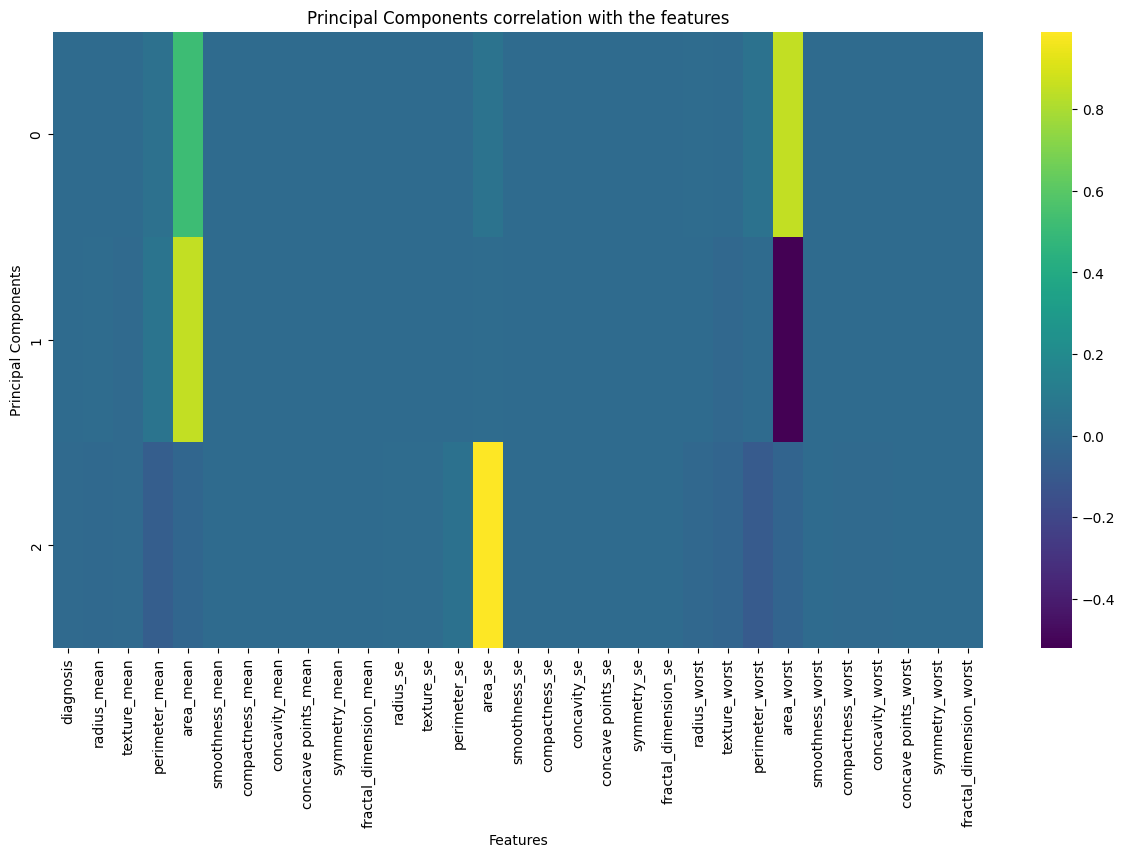

In [124]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_pc, cmap='viridis')
plt.title('Principal Components correlation with the features')
plt.xlabel('Features')
plt.ylabel('Principal Components')